# Notebook to better understand datasets

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from torch_geometric_temporal.dataset import METRLADatasetLoader

import sys
sys.path.append('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/')

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## 1. METR-LA


### 1.1. Raw data set

In [2]:
import numpy as np
from torch_geometric_temporal.dataset import METRLADatasetLoader

loader = METRLADatasetLoader()
dataset_metrola = loader.get_dataset(num_timesteps_in=1000, num_timesteps_out=100)

/mnt/cephfs/store/gr-mc2473/lc865/misc/condaforge/envs/ml-gnn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>

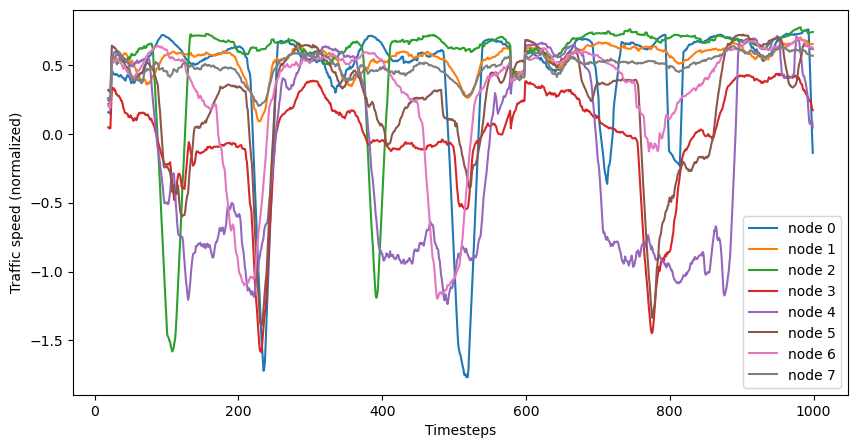

In [30]:
plt.figure(figsize=(10, 5))
for node_idx in range(8):
    plt.plot(pd.Series(dataset_metrola[0].x[node_idx, 0, :].T).rolling(window=20).mean(), label=f'node {node_idx}')
plt.legend()
plt.xlabel('Timesteps')
plt.ylabel('Traffic speed (normalized)')
plt.show()


### 1.2. Same data set as used for current training runs

In [1]:
import sys
sys.path.append('/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1/')
from importlib import reload
from model import dataset
reload(dataset)
from model.dataset import create_dataloaders
from omegaconf import OmegaConf
import pandas as pd
import torch

cfg = OmegaConf.load('/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/config.yaml')
cfg = OmegaConf.merge(cfg, OmegaConf.load('/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/metrla.yaml'))
# cfg.train.max_len = 200
train_loader, val_loader, test_loader, topo_data, metadata = create_dataloaders(cfg, raw_data_dir='/mnt/cephfs/store/gr-mc2473/lc865/workspace/GNN/data')

/mnt/cephfs/store/gr-mc2473/lc865/misc/condaforge/envs/ml-gnn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Dataloaders and Topology Data Overview:
Batch size: 16
----------------------------------------------------------
Name                 | Samples      | Batches     
----------------------------------------------------------
Train Loader         | 30824        | 1926        
Val Loader           | 3424         | 214         

Topology Data:
Number of nodes: 207
Number of edges: 1722
----------------------------------------------------------


### Check missing data ratio

In [29]:
a = torch.stack([train_loader.dataset[i][0][:, 0] for i in range(30000)]).T

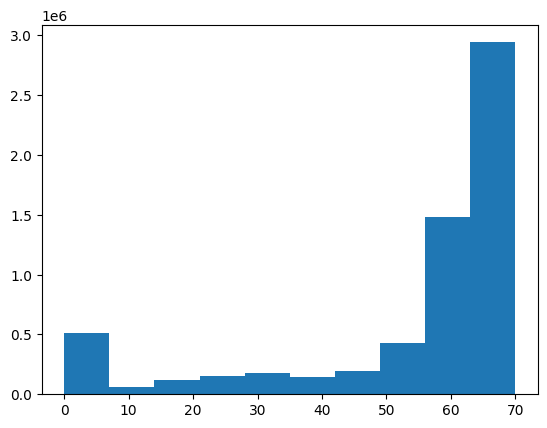

In [30]:
a = a * metadata['norm_std'] + metadata['norm_mean']

from matplotlib import pyplot as plt
plt.hist(a.flatten())
plt.show()

In [35]:
torch.sum(a==0)/a.numel()

tensor(0.0807)

### Check scales

In [25]:

a = torch.stack([train_loader.dataset[i][1] for i in range(4500)])
pd.Series(a.flatten()).describe()


count    1.117800e+07
mean     1.452529e-02
std      9.903865e-01
min     -2.652154e+00
25%     -1.730197e-02
50%      4.403954e-01
75%      6.259484e-01
max      8.115013e-01
dtype: float64

In [ ]:
# Without normalisation:
# count    1.117800e+07
# mean     5.524937e+01
# std      1.843342e+01
# min      0.000000e+00
# 25%      5.488889e+01
# 50%      6.275000e+01
# 75%      6.633334e+01
# max      7.000000e+01
# dtype: float64

### Check what the second feature is

In [1]:
import numpy as np
from torch_geometric_temporal.dataset import METRLADatasetLoader

loader = METRLADatasetLoader()
dataset_metrola = loader.get_dataset(num_timesteps_in=1000, num_timesteps_out=100)

/mnt/cephfs/store/gr-mc2473/lc865/misc/condaforge/envs/ml-gnn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


self.means=array([53.59967  ,  0.4982691], dtype=float32)
self.stds=array([20.209862  ,  0.28815305], dtype=float32)


In [42]:
list(filter(lambda x: not x.startswith('_'), dir(dataset_metrola)))

['additional_feature_keys',
 'edge_index',
 'edge_weight',
 'features',
 'snapshot_count',
 'targets']

(array([24012., 24012., 24012., 23184., 22356., 18009., 17388., 18009.,
        18009., 18009.]),
 array([0.        , 0.09965278, 0.19930556, 0.29895833, 0.39861113,
        0.4982639 , 0.59791666, 0.69756943, 0.79722226, 0.89687502,
        0.99652779]),
 <BarContainer object of 10 artists>)

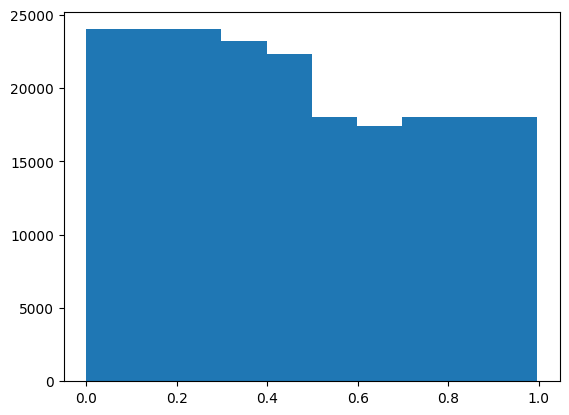

In [6]:
# self.means=array([53.59967  ,  0.4982691], dtype=float32)
# self.stds=array([20.209862  ,  0.28815305], dtype=float32)

from matplotlib import pyplot as plt
b = dataset_metrola.features[0][:, 1, :]
b = b * 0.28815305 + 0.4982691
plt.hist(b.flatten())

### Misc

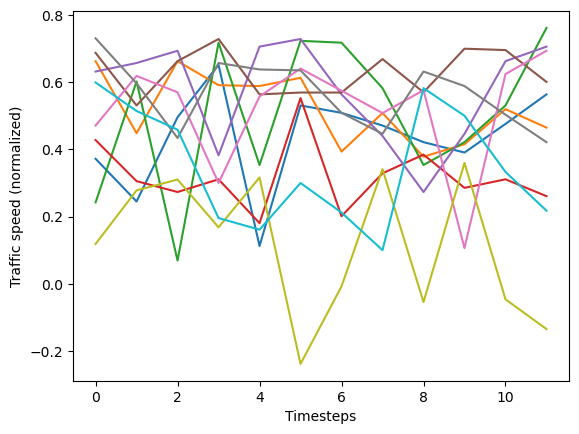

In [124]:
import torch

n_nodes = 10
a = torch.stack([train_loader.dataset[i].y[:n_nodes, 0] for i in range(int(cfg.train.max_len*cfg.train.train_size))])
plt.plot(train_loader.dataset[0].y[:n_nodes, :].T)
plt.xlabel('Timesteps')
plt.ylabel('Traffic speed (normalized)')
plt.show()


## Dev for new dataset pipeline

In [ ]:
## Config building
"""
Need:
- dataset params (should use HDTTS settings)
- window params
"""


In [2]:
import sys
sys.path.append('/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1')
from hdtts_dataset_creation.dataset_util import load_dataset, load_synthetic_dataset
from hdtts_dataset_creation import PvUS, EngRad
from omegaconf import OmegaConf
import numpy as np
from model.dataset import create_sliding_window_dataset
from tsl.ops.connectivity import adj_to_edge_index
import os

fpath = '/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/configs/metrla.yaml'
failure_mode_path = '/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/configs/mode'

cfg = OmegaConf.load(fpath)
failure_mode = '_'.join(cfg.dataset_HDTTS.name.split('_')[1:])
failure_cfg = OmegaConf.load(os.path.join(failure_mode_path, failure_mode + '.yaml'))
cfg.dataset_HDTTS.mode = OmegaConf.merge(cfg.dataset_HDTTS.mode, failure_cfg)


/mnt/cephfs/store/gr-mc2473/lc865/misc/condaforge/envs/ml-gnn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from model.dataset import get_data_raw
x, y, edge_index, edge_weight, n_nodes, data = get_data_raw(cfg, root='/mnt/cephfs/store/gr-mc2473/lc865/workspace/GNN/data_HDTTS')


/mnt/cephfs/store/gr-mc2473/lc865/misc/condaforge/envs/ml-gnn/lib/python3.10/site-packages/tsl/datasets/metr_la.py:98: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(df.index[0], df.index[-1], freq='5T')
/mnt/cephfs/store/gr-mc2473/lc865/misc/condaforge/envs/ml-gnn/lib/python3.10/site-packages/tsl/datasets/metr_la.py:109: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  df = df.replace(to_replace=0., method='ffill')


Predicted raw dataset size: 1.36 GB


In [28]:
from importlib import reload
import model.dataset as dataset
reload(dataset)
from model.dataset import create_dataloaders
train_loader, val_loader, test_loader, topo_data, metadata = create_dataloaders(cfg, raw_data_dir='/mnt/cephfs/store/gr-mc2473/lc865/workspace/GNN/data', num_workers=1)


/mnt/cephfs/store/gr-mc2473/lc865/misc/condaforge/envs/ml-gnn/lib/python3.10/site-packages/tsl/datasets/metr_la.py:98: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(df.index[0], df.index[-1], freq='5T')
/mnt/cephfs/store/gr-mc2473/lc865/misc/condaforge/envs/ml-gnn/lib/python3.10/site-packages/tsl/datasets/metr_la.py:109: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  df = df.replace(to_replace=0., method='ffill')


Predicted raw dataset size: 1.36 GB

Dataloaders and Topology Data Overview:
Batch size: 16
----------------------------------------------------------
Name                 | Samples      | Batches     
----------------------------------------------------------
Train Loader         | 23973        | 1498        
Val Loader           | 3424         | 214         
Test Loader          | 6849         | 428         

Topology Data:
Number of nodes: 207
Number of edges: 1515
----------------------------------------------------------


In [27]:
topo_data.edge_weight.shape


torch.Size([1, 1515])

In [26]:
topo_data.edge_index.shape

torch.Size([2, 1515])

In [49]:
import sys
sys.path.append('/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1')
from hdtts_dataset_creation.dataset_util import load_dataset, load_synthetic_dataset
from hdtts_dataset_creation import PvUS, EngRad
from omegaconf import OmegaConf
import numpy as np
from model.dataset import create_sliding_window_dataset
from tsl.ops.connectivity import adj_to_edge_index

def get_data_raw(cfg: OmegaConf, root='/data'):
    """
    Config is whole config.
    """

    if cfg.dataset_HDTTS.name.startswith('mso'):
        dataset, adj, mask = load_synthetic_dataset(cfg.dataset_HDTTS, root_dir=root)

        # Get data and set missing values to nan
        data = dataset.dataframe()
        masked_data = data.where(mask.reshape(mask.shape[0], -1), np.nan)
        # Fill nan with Last Observation Carried Forward
        data = masked_data.ffill().bfill()
    else:
        dataset, adj, mask = load_dataset(cfg.dataset_HDTTS, root_dir=root)

        # Get data and set missing values to nan
        data = dataset.dataframe()
        masked_data = data.where(mask.reshape(mask.shape[0], -1), np.nan)

        if isinstance(dataset, PvUS):
            # Fill nan with Last -24h Observation Carried Forward
            data = masked_data.groupby([data.index.hour, data.index.minute]).ffill()
            data = data.groupby([data.index.hour, data.index.minute]).bfill()
        else:
            # Fill nan with Last Observation Carried Forward
            data = masked_data.ffill().bfill()
        # Fill remaining nan with 0, if any
        data.fillna(0, inplace=True)

    if isinstance(dataset, EngRad):  # FIXME: Quickfix as model is currently univariate
        data = data.iloc[:, cfg.dataset.EngRADchannel::5]

    # (n_timesteps, n_nodes, n_features)
    x, y = create_sliding_window_dataset(data.to_numpy(), cfg.dataset.window, cfg.dataset.delay, cfg.dataset.horizon, cfg.dataset.stride, max_steps=cfg.dataset.max_len)

    n_nodes = dataset.n_nodes
    edge_index, edge_weight = adj_to_edge_index(adj.todense())

    return x, y, edge_index, edge_weight, n_nodes, data

x, y, edge_index, edge_weight, n_nodes, data = get_data_raw(cfg, root='/mnt/cephfs/store/gr-mc2473/lc865/workspace/GNN/data_HDTTS')


/mnt/cephfs/store/gr-mc2473/lc865/misc/condaforge/envs/ml-gnn/lib/python3.10/site-packages/tsl/datasets/metr_la.py:98: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(df.index[0], df.index[-1], freq='5T')
/mnt/cephfs/store/gr-mc2473/lc865/misc/condaforge/envs/ml-gnn/lib/python3.10/site-packages/tsl/datasets/metr_la.py:109: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  df = df.replace(to_replace=0., method='ffill')


Predicted raw dataset size: 1.36 GB


In [52]:
import pandas as pd
pd.Series(x.flatten()).describe()

count    8.507203e+07
mean     5.836568e+01
std      1.321032e+01
min      3.333333e-01
25%      5.700000e+01
50%      6.322222e+01
75%      6.655556e+01
max      7.000000e+01
dtype: float64

In [58]:
pd.Series(data.to_numpy().flatten()).value_counts()

68.000000    86920
67.000000    85281
66.000000    80985
65.000000    78925
70.000000    77137
             ...  
5.900000         1
12.100000        1
1.111111         1
7.700000         1
42.700001        1
Name: count, Length: 2164, dtype: int64

In [17]:
dataset.dataframe()

nodes,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
channels,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125000,67.125000,59.625000,62.750000,...,45.625000,65.500000,64.500000,66.428574,66.875000,59.375000,69.000000,59.250000,69.000000,61.875000
2012-03-01 00:05:00,62.666668,68.555557,65.444443,62.444443,64.444443,68.111115,65.000000,65.000000,57.444443,63.333332,...,50.666668,69.875000,66.666664,58.555557,62.000000,61.111111,64.444443,55.888889,68.444443,62.875000
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857140,62.000000
2012-03-01 00:15:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857140,62.000000
2012-03-01 00:20:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857140,62.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-27 23:35:00,65.000000,65.888885,68.555557,61.666668,32.833332,54.555557,62.444443,63.333332,59.222221,65.333336,...,52.888889,69.000000,65.111115,55.666668,66.333336,62.444443,66.777779,64.888885,69.666664,62.333332
2012-06-27 23:40:00,61.375000,65.625000,66.500000,62.750000,32.833332,50.500000,62.000000,67.000000,65.250000,67.125000,...,54.000000,69.250000,60.125000,60.500000,67.250000,59.375000,66.000000,61.250000,69.000000,62.000000
2012-06-27 23:45:00,67.000000,59.666668,69.555557,61.000000,32.833332,44.777779,64.222221,63.777779,59.777779,57.666668,...,51.333332,67.888885,64.333336,57.000000,66.000000,62.666668,68.666664,63.333332,67.444443,61.222221
